### Table of contents
1. [Import libraries](#section-1)
2. [Total rescue actions map (2018-2022)](#2.-Total-rescue-actions-map)
    1. [Data exploration](#2.A-Data-exploration)
    2. [Catalonia map](#2.B-Catalonia-map)
    3. [A first geographical plot ](#2.C-A-first-geographical-plot)
3. [Civil protection plans (2018-2022)](#3.-Civil-protection-plans)
    1. [Data exploration](#3.A.-Data-exploration)
        1. [Extramunicipal PP](#Supramunicipal-protection-plans)
        2. [Municipal PP](#Municipal-protection-plans)
    2. [Homologation, update and revision of PP by county](#3.B-Homologation,-update-and-revision-of-PP-by-county)
    3. [A second geographical plot](#3.C-A-second-geographical-plot)
4. [Rescue/ CPP study of Baix Llobregat](#4.-Rescue/-CPP-study-of-Baix-Llobregat)
    1. [Rescue actions study of Baix Llobregat](#4.A-Rescue-actions-study-of-Baix-Llobregat)

### Import libraries

In [1]:
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
import seaborn as sns
%matplotlib inline

Set data directory

In [2]:
data_dir = '../dades/'

### 2. Total rescue actions map
The first information we are interested in is finding a geographical plot containing all the rescue actions carried out by the Fire Department between 2018 and 2022, in order to indentify which how rescue actions (of any kind) are distributed geographically.

In [3]:
#load data
rescue_actions = pd.read_csv(data_dir+'Actuacions_en_salvaments_al_medi_natural_dels_Bombers_de_la_Generalitat_20231109.csv')

#### 2.A Data exploration
Exploration of data, in order to find if any formatting is needed in order te treat the data.

In [4]:
rescue_actions.head()

,ACT_NUM_ACTUACIO,NOM REGIO,TAL_COD_ALARMA1,TGA_NOM_GRUPO,TAL_COD_ALARMA2,TAL_NOM_ALARMA,CODI_INE,MUNICIPI,NOM_POBLACIO,CODI_COMARCA,...,ANY,MES,ACT_DAT_ACTUACIO,ACT_X_UTM,ACT_Y_UTM,CODI_REGIO,VALIDAT,LONGITUD,LATITUD,GEOREFERÈNCIA
0,232539916,Metropolitana Nord,SV,salvaments,MU,Salvament i/o rescat de muntanya,8261,Santa Susanna,Santa Susanna,21,...,2023,10,08/10/2023,474668.0,4610652.0,25,N,2.695798,41.647208,POINT (2.695797715126 41.647207730681)
1,230315085,Lleida,SV,salvaments,MU,Salvament i/o rescat de muntanya,25043,"Vall de Boí, La","Vall de Boí, La",5,...,2023,10,08/10/2023,324638.0,4719040.0,3,N,0.862264,42.603854,POINT (0.862264040642 42.603853695832)
2,232315301,Centre,SV,salvaments,MU,Salvament i/o rescat de muntanya,8175,Puig-reig,Cal Riera,14,...,2023,10,08/10/2023,407110.0,4642434.0,23,N,1.879642,41.928405,POINT (1.879641578211 41.92840451498)
3,230229809,Girona,SV,salvaments,MU,Salvament i/o rescat de muntanya,17095,Lloret de Mar,Lloret de Mar,34,...,2023,10,08/10/2023,487480.0,4620337.0,2,N,2.849448,41.734746,POINT (2.849448083699 41.734745914847)
4,230229850,Girona,SV,salvaments,RA,Acompanyament de persones perdudes,17185,Sant Joan les Fonts,Sant Joan les Fonts,19,...,2023,10,08/10/2023,463030.0,4673271.0,2,N,2.552117,42.210731,POINT (2.55211709702 42.210731354776)


What columns does the dataframe have?

In [5]:
rescue_actions.columns

Index(['ACT_NUM_ACTUACIO', 'NOM REGIO', 'TAL_COD_ALARMA1', 'TGA_NOM_GRUPO',
       'TAL_COD_ALARMA2', 'TAL_NOM_ALARMA', 'CODI_INE', 'MUNICIPI',
       'NOM_POBLACIO', 'CODI_COMARCA', 'NOM_COMARCA', 'ANY', 'MES',
       'ACT_DAT_ACTUACIO', 'ACT_X_UTM', 'ACT_Y_UTM', 'CODI_REGIO', 'VALIDAT',
       'LONGITUD', 'LATITUD', 'GEOREFERÈNCIA'],
      dtype='object')

We will only study the time window between 2018-2022

In [6]:
rescue_actions[(rescue_actions["ANY"] >= 2018) & (rescue_actions["ANY"]<= 2022)]

,ACT_NUM_ACTUACIO,NOM REGIO,TAL_COD_ALARMA1,TGA_NOM_GRUPO,TAL_COD_ALARMA2,TAL_NOM_ALARMA,CODI_INE,MUNICIPI,NOM_POBLACIO,CODI_COMARCA,...,ANY,MES,ACT_DAT_ACTUACIO,ACT_X_UTM,ACT_Y_UTM,CODI_REGIO,VALIDAT,LONGITUD,LATITUD,GEOREFERÈNCIA
1794,220317846,Lleida,SV,salvaments,MU,Salvament i/o rescat de muntanya,25089,Farrera,Montesclado,26,...,2022,12,31/12/2022,359029.0,4703443.0,3,S,1.285146,42.470508,POINT (1.285146163115 42.47050799814)
1795,220424995,Tarragona,SV,salvaments,MU,Salvament i/o rescat de muntanya,43049,Cornudella de Montsant,Siurana,29,...,2022,12,31/12/2022,326877.0,4569430.0,4,S,0.933488,41.257753,POINT (0.933487648042 41.257752634189)
1796,222433564,Metropolitana Sud,SV,salvaments,MU,Salvament i/o rescat de muntanya,8270,Sitges,Sitges,17,...,2022,12,31/12/2022,396692.0,4564042.0,24,S,1.767511,41.221172,POINT (1.767511104528 41.221172153671)
1797,222703229,U.F. Val d'Aran,SV,salvaments,MU,Salvament i/o rescat de muntanya,25025,Naut Aran,Naut Aran,39,...,2022,12,31/12/2022,335546.0,4726173.0,27,S,0.993092,42.670455,POINT (0.993092440136 42.670455109079)
1798,222318655,Centre,SV,salvaments,MU,Salvament i/o rescat de muntanya,17006,Alp,Alp,15,...,2022,12,31/12/2022,409042.0,4687406.0,23,S,1.895928,42.333593,POINT (1.895928288604 42.333593201755)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,182600035,Terres de l'Ebre,SV,salvaments,MU,Rescat de muntanya,43136,Sant Carles de la Ràpita,Sant Carles de la Ràpita,22,...,2018,1,02/01/2018,292357.0,4500888.0,26,SI,0.544737,40.632747,NaN
10233,182500044,Metropolitana Nord,SV,salvaments,MR,Recerca i/o rescat en medi marítim,8121,Mataró,Mataró,21,...,2018,1,01/01/2018,454218.0,4597542.0,25,SI,2.451231,41.528215,NaN
10234,180200036,Girona,SV,salvaments,MU,Rescat de muntanya,17032,Cadaqués,Cadaqués,2,...,2018,1,01/01/2018,524808.0,4684559.0,2,SI,3.301029,42.312873,NaN
10235,182500054,Metropolitana Nord,SV,salvaments,RC,Recerca persones perdudes,8120,Matadepera,Matadepera,40,...,2018,1,01/01/2018,418314.0,4610776.0,25,SI,2.019110,41.644542,NaN


Make a copy of filtered by year results

In [7]:
filt_rescues = rescue_actions[(rescue_actions["ANY"] >= 2018) & (rescue_actions["ANY"]<= 2022)].copy(deep = True)

Is there a standard numenclature for the type of rescue type?

In [8]:
filt_rescues["TAL_NOM_ALARMA"].unique()

array(['Salvament i/o rescat de muntanya',
       'Salvament i/o recerca i/o rescat en medi fluvial (rius,barrancs, llacs)',
       'Recerca persones perdudes o desaparegudes',
       'Salvament i/o recerca i/o rescat en medi marítim',
       'Salvament i/o rescat en coves i pous', 'Rescat de muntanya',
       'Recerca persones perdudes', 'Recerca i/o rescat en medi marítim',
       'Recerca i/o rescat en medi fluvial (rius, barrancs, llacs)',
       'Rescat en coves i pous'], dtype=object)

What data type is used for the dates?

In [9]:
type(filt_rescues.iloc[0]["ACT_DAT_ACTUACIO"])

str

Are county names unique (standarized names?)

In [10]:
filt_rescues["NOM_COMARCA"].unique()

array(['Pallars Sobirà', 'Priorat', 'Garraf', "Val d'Aran", 'Cerdanya',
       'Alt Penedès', 'Bages', 'Baix Camp', 'Baix Llobregat', 'Gironès',
       'Garrotxa', 'Segrià', 'Ripollès', 'Alt Camp', 'Alt Urgell',
       'Maresme', 'Vallès Oriental', 'Pallars Jussà', 'Baix Ebre',
       'Osona', 'Vallès Occidental', 'Conca de Barberà', 'Alt Empordà',
       'Barcelonès', 'Solsonès', "Pla de l'Estany", 'Baix Empordà',
       "Ribera d'Ebre", 'Tarragonès', 'Alta Ribagorça', 'Terra Alta',
       'Berguedà', 'Anoia', 'Selva', 'Moianès', 'Noguera', 'Montsià',
       'Baix Penedès', 'Fora de Catalunya', 'Urgell', "Pla d'Urgell",
       'Garrigues', 'Segarra'], dtype=object)

How many rescue actions by county in 2018-2022 period?

In [11]:
rescue_tot_comarca = filt_rescues[["CODI_COMARCA", "NOM_COMARCA","ACT_NUM_ACTUACIO"]].groupby(["CODI_COMARCA", "NOM_COMARCA"]).count().copy(deep = True).reset_index()
rescue_tot_comarca.head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO
0,0,Fora de Catalunya,8
1,1,Alt Camp,80
2,2,Alt Empordà,398
3,3,Alt Penedès,120
4,4,Alt Urgell,192


In [12]:
#We are only interested in rescue actions in Catalonia, se we need to pop 'Fora de Catalunya'
rescue_tot_comarca.drop(0, inplace =  True)

In [13]:
rescue_tot_comarca.head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO
1,1,Alt Camp,80
2,2,Alt Empordà,398
3,3,Alt Penedès,120
4,4,Alt Urgell,192
5,5,Alta Ribagorça,196


What are the counties with most rescue actions?

In [14]:
rescue_tot_comarca.sort_values(by='ACT_NUM_ACTUACIO', ascending = False).head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO
11,11,Baix Llobregat,527
40,40,Vallès Occidental,517
39,39,Val d'Aran,500
31,31,Ripollès,479
14,14,Berguedà,417


#### 2.B Catalonia map
Read a Catalonia map dated in 2022 (we need to exclude the recently added county Lluçanès)

In [15]:
cat = gpd.read_file(data_dir + "divisions-administratives-v2r1-comarques-100000-20220801.shx")
cat.rename(columns = {'NOMCOMAR':'NOM_COMARCA'}, inplace = True)
cat.head()

,CODICOMAR,NOM_COMARCA,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4..."
1,02,Alt Empordà,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,04,Alt Urgell,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4..."


Merging of DataFrames.

In [16]:
merged_rescue_tot = rescue_tot_comarca.merge(cat, how='left', on='NOM_COMARCA')
# merged_rescue_tot_gpd = gpd.GeoDataFrame(merged_rescue_tot, geometry="geometry", crs="EPSG:4326")
merged_rescue_tot_gpd = gpd.GeoDataFrame(merged_rescue_tot, geometry="geometry")
merged_rescue_tot.head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO,CODICOMAR,CAPCOMAR,AREAC5000,geometry
0,1,Alt Camp,80,01,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4..."
1,2,Alt Empordà,398,02,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
2,3,Alt Penedès,120,03,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,4,Alt Urgell,192,04,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624..."
4,5,Alta Ribagorça,196,05,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4..."


#### 2.C A first geographical plot 
Total number of rescue actions between 2018 and 2022.

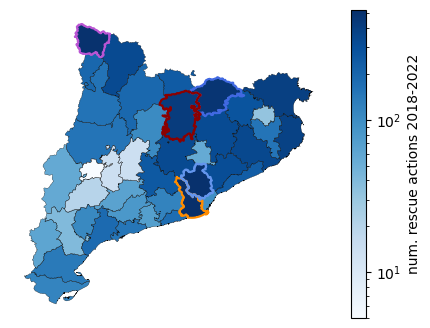

In [17]:
#highlight the counties with most rescue actions
colors = {"Baix Llobregat":'darkorange',
          "Vallès Occidental":'cornflowerblue',
          "Val d'Aran":'mediumorchid',
          "Ripollès":'royalblue',
          "Berguedà":'darkred'}

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
norm = LogNorm()
# plt.rc('text', usetex = True)
# plt.rc('font', family='serif')
plot = merged_rescue_tot_gpd.plot(column = 'ACT_NUM_ACTUACIO',
                                  ax=ax,
                                  legend=False,
                                  cmap='Blues',
                                  norm = norm,
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.2})
merged_rescue_tot_gpd.boundary.plot(ax = ax, linewidth = 0.2, color = 'black')
merged_rescue_tot_gpd = merged_rescue_tot_gpd.set_index("NOM_COMARCA")
merged_rescue_tot_gpd.loc[list(colors.keys()),:].boundary.plot(ax=ax,color=list(colors.values()), linewidth = 1.5)
merged_rescue_tot_gpd = merged_rescue_tot_gpd.reset_index()
cbar = fig.colorbar(plot.get_children()[0], ax = ax, label = r'num. rescue actions 2018-2022')
cb_ax = fig.axes[1] 
# cb_ax.tick_params(labelsize=10)
plt.savefig('figures/total_num_2018_2022.pdf')
plt.show()

### 3. Civil protection plans

Import data

In [18]:
#import
prot_plans = pd.read_csv(data_dir+'Registre_general_de_plans_de_protecci__civil_de_Catalunya_20231109.csv')

#### 3.A. Data exploration

In [19]:
prot_plans.head()

,Tipus pla,Número d'inscripció,Nom del pla,Estat,Data d'homologació,Últim esdeveniment,Data de l'últim esdeveniment,Ine5,Municipi,Comarca,Servei territorial,Vegueria,Província
0,-,2208,PA PROCICAT - Emergències Episodis Contaminaci...,Aprovat pendent revisió,NaN,Actualització,13/02/2014,NaN,NaN,NaN,NaN,NaN,NaN
1,-,1296,PA del PROCICAT per Subsidència al barri de l'...,Revisió,NaN,Actualització,26/04/2012,NaN,NaN,NaN,NaN,NaN,NaN
2,E,2654,PAM INFOCAT La Selva del Camp,Homologat pendent de revisió,22/10/2009,Homologació,22/10/2009,43145.0,Selva del Camp,Baix Camp,Tarragona,Tarragona,Tarragona
3,E,2941,PAM SISMICAT Queralbs,Homologat pendent de revisió,08/09/2010,Homologació,08/09/2010,17043.0,Queralbs,Ripollès,Girona,Girona,Girona
4,E,2423,PAM INFOCAT Arsèguel,Homologat pendent de revisió,09/07/2009,Homologació,09/07/2009,25032.0,Arsèguel,Alt Urgell,Alt Pirineu i Aran,Alt Pirineu i Aran,Lleida


We only need data for updates/homologation/revision over the period 2018-2022. What is the time format?

In [20]:
prot_plans["Data de l'últim esdeveniment"].loc[0]

'13/02/2014'

És type string, canviem a datetime

In [21]:
prot_plans["Data d'homologació"] = pd.to_datetime(prot_plans["Data d'homologació"], format='%d/%m/%Y')
prot_plans["Data de l'últim esdeveniment"] = pd.to_datetime(prot_plans["Data de l'últim esdeveniment"], format='%d/%m/%Y')

In [22]:
prot_plans["Data de l'últim esdeveniment"].loc[0]

Timestamp('2014-02-13 00:00:00')

We can use this code to find the year of each entry

In [23]:
prot_plans["Data de l'últim esdeveniment"].loc[0].year

2014

Filter between 2018-2022, sort by ascending date and make a copy.

In [24]:
filt_prot_plans = prot_plans[(prot_plans["Data de l'últim esdeveniment"].dt.year >= 2018) & (prot_plans["Data de l'últim esdeveniment"].dt.year <= 2022)].sort_values(by = "Data de l'últim esdeveniment").copy(deep = True)

In [25]:
filt_prot_plans.head()

,Tipus pla,Número d'inscripció,Nom del pla,Estat,Data d'homologació,Últim esdeveniment,Data de l'últim esdeveniment,Ine5,Municipi,Comarca,Servei territorial,Vegueria,Província
2190,E,5682,PAM TRANSCAT Amposta,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43014.0,Amposta,Montsià,Terres de l'Ebre,Terres de l'Ebre,Tarragona
2748,E,5709,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43065.0,Garcia,Ribera d'Ebre,Terres de l'Ebre,Terres de l'Ebre,Tarragona
4551,E,5603,PAM INUNCAT Vilagrassa,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,25244.0,Vilagrassa,Urgell,Lleida,Lleida,Lleida
2260,E,5662,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43171.0,Vila-seca,Tarragonès,Tarragona,Tarragona,Tarragona
2259,T,5542,PBEM Ivars de Noguera,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,25112.0,Ivars de Noguera,Noguera,Lleida,Lleida,Lleida


##### Supramunicipal protection plans

In [26]:
filt_prot_plans[filt_prot_plans['Província'].isnull()]

,Tipus pla,Número d'inscripció,Nom del pla,Estat,Data d'homologació,Últim esdeveniment,Data de l'últim esdeveniment,Ine5,Municipi,Comarca,Servei territorial,Vegueria,Província
4682,E,22,INFOCAT,Aprovat pendent revisió,NaT,Actualització,2021-12-10,NaN,NaN,NaN,NaN,NaN,NaN
4680,E,4,SISMICAT,Aprovat,NaT,Actualització,2021-12-10,NaN,NaN,NaN,NaN,NaN,NaN
4681,E,6348,Pla Especial d’emergències per Pandèmies,Aprovat,NaT,Aprovació,2022-03-29,NaN,NaN,NaN,NaN,NaN,NaN
4655,T,1,PROCICAT,Aprovat,NaT,Aprovació,2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN
643,E,5,TRANSCAT,Aprovat,NaT,Actualització,2022-10-06,NaN,NaN,NaN,NaN,NaN,NaN
645,E,2899,RADCAT,Aprovat pendent revisió,NaT,Actualització,2022-10-06,NaN,NaN,NaN,NaN,NaN,NaN


##### Municipal protection plans

In [27]:
filt_prot_plans[filt_prot_plans['Província'].notnull()]

,Tipus pla,Número d'inscripció,Nom del pla,Estat,Data d'homologació,Últim esdeveniment,Data de l'últim esdeveniment,Ine5,Municipi,Comarca,Servei territorial,Vegueria,Província
2190,E,5682,PAM TRANSCAT Amposta,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43014.0,Amposta,Montsià,Terres de l'Ebre,Terres de l'Ebre,Tarragona
2748,E,5709,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43065.0,Garcia,Ribera d'Ebre,Terres de l'Ebre,Terres de l'Ebre,Tarragona
4551,E,5603,PAM INUNCAT Vilagrassa,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,25244.0,Vilagrassa,Urgell,Lleida,Lleida,Lleida
2260,E,5662,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,43171.0,Vila-seca,Tarragonès,Tarragona,Tarragona,Tarragona
2259,T,5542,PBEM Ivars de Noguera,Homologat pendent de revisió,2018-12-05,Homologació,2018-12-05,25112.0,Ivars de Noguera,Noguera,Lleida,Lleida,Lleida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,E,10640,PAM INUNCAT Sant Joan Despí,Homologat,2022-12-15,Homologació,2022-12-15,8217.0,Sant Joan Despí,Baix Llobregat,Barcelona,Barcelona,Barcelona
2468,T,10651,PA PROCICAT - Malalties Transmissibles Emergen...,Homologat,2022-12-15,Homologació,2022-12-15,8009.0,Argentona,Maresme,Barcelona,Barcelona,Barcelona
1349,T,10776,PBEM Cervera,Homologat,2022-12-15,Revisió,2022-12-15,25072.0,Cervera,Segarra,Lleida,Lleida,Lleida
2592,E,10793,PAM SISMICAT Mataró,Homologat,2022-12-15,Revisió,2022-12-15,8121.0,Mataró,Maresme,Barcelona,Barcelona,Barcelona


We are only interested in municipal protection plans (supramunicipal are generic, for whole Catalonia). We do not need the columns num inscr., data homog., ine5., vegueria, servei territorial

In [28]:
drop_columns = ["Número d'inscripció", "Data d'homologació", "Ine5", "Servei territorial", "Vegueria"]
pam_prot_plans = filt_prot_plans[filt_prot_plans['Província'].notnull()].copy(deep = True).drop(columns = drop_columns)
pam_prot_plans.rename(columns = {'Comarca':'NOM_COMARCA'}, inplace = True)
pam_prot_plans.head()

,Tipus pla,Nom del pla,Estat,Últim esdeveniment,Data de l'últim esdeveniment,Municipi,NOM_COMARCA,Província
2190,E,PAM TRANSCAT Amposta,Homologat pendent de revisió,Homologació,2018-12-05,Amposta,Montsià,Tarragona
2748,E,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,Homologació,2018-12-05,Garcia,Ribera d'Ebre,Tarragona
4551,E,PAM INUNCAT Vilagrassa,Homologat pendent de revisió,Homologació,2018-12-05,Vilagrassa,Urgell,Lleida
2260,E,PA PROCICAT - Emergències Episodis Contaminaci...,Homologat pendent de revisió,Homologació,2018-12-05,Vila-seca,Tarragonès,Tarragona
2259,T,PBEM Ivars de Noguera,Homologat pendent de revisió,Homologació,2018-12-05,Ivars de Noguera,Noguera,Lleida


In [29]:
pam_prot_plans["NOM_COMARCA"].unique()

array(['Montsià', "Ribera d'Ebre", 'Urgell', 'Tarragonès', 'Noguera',
       'Garrigues', 'Baix Empordà', 'Osona', 'Segrià', 'Anoia',
       'Garrotxa', 'Aran', 'Cerdanya', 'Baix Ebre', 'Alt Camp',
       'Pallars Sobirà', 'Lluçanès', 'Vallès Oriental',
       'Vallès Occidental', 'Alt Urgell', 'Berguedà', 'Selva', 'Ripollès',
       'Baix Camp', 'Conca de Barberà', 'Maresme', "Pla de l'Estany",
       'Bages', 'Terra Alta', 'Pallars Jussà', 'Gironès', 'Alt Empordà',
       'Segarra', 'Baix Llobregat', 'Alt Penedès', 'Garraf',
       'Baix Penedès', 'Priorat', 'Solsonès', 'Barcelonès', 'Moianès'],
      dtype=object)

It seem that Alta Ribagorça does not appear in the data.

#### 3.B Homologation, update and revision of PP by county
What is the total number of actions (homologation, update or revision) of protection plans by county?

In [30]:
cols = pam_prot_plans.columns.to_list()
cols.remove('Estat')
cols.remove('NOM_COMARCA')

In [31]:
pam_pp_tot = pam_prot_plans.drop(columns = cols).copy(deep = True).groupby(by = "NOM_COMARCA").count().sort_values(by = 'Estat', ascending = False).reset_index()
pam_pp_tot.replace("Aran", "Val d'Aran", inplace = True) #we need to change from Aran to Val d'Aran

In [32]:
#We need to add Alta Ribagorça and Pla d'Urgell manually, since it has 0 entries between 2018 and 2022
pam_pp_tot.loc[len(pam_pp_tot.index)] = ["Alta Ribagorça", 0]
pam_pp_tot.loc[len(pam_pp_tot.index)+1] = ["Pla d'Urgell", 0]

In [33]:
pam_pp_tot

,NOM_COMARCA,Estat
0,Osona,201
1,Bages,135
2,Alt Penedès,131
3,Baix Llobregat,124
4,Segarra,116
5,Baix Empordà,116
6,Noguera,115
7,Alt Empordà,108
8,Selva,104
9,Tarragonès,86


#### 3.C A second geographical plot
Merge first with catalonia geometry DataFrame

In [34]:
pam_pp_tot = pam_pp_tot.merge(cat, how='left', on='NOM_COMARCA')
pam_pp_tot_gpd = gpd.GeoDataFrame(pam_pp_tot, geometry="geometry")

In [35]:
pam_pp_tot_gpd

,NOM_COMARCA,Estat,CODICOMAR,CAPCOMAR,AREAC5000,geometry
0,Osona,201,24,Vic,1246.9802,"MULTIPOLYGON (((418580.652 4643167.275, 418307..."
1,Bages,135,07,Manresa,1092.7982,"POLYGON ((417259.067 4646530.811, 417513.903 4..."
2,Alt Penedès,131,03,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,Baix Llobregat,124,11,Sant Feliu de Llobregat,487.4743,"POLYGON ((401068.400 4606276.800, 401178.618 4..."
4,Segarra,116,32,Cervera,723.5756,"POLYGON ((365993.100 4642951.900, 366072.200 4..."
5,Baix Empordà,116,10,la Bisbal d'Empordà,701.1353,"MULTIPOLYGON (((497966.430 4622427.830, 497965..."
6,Noguera,115,23,Balaguer,1783.3727,"POLYGON ((348524.976 4664596.302, 348400.341 4..."
7,Alt Empordà,108,02,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
8,Selva,104,34,Santa Coloma de Farners,994.0428,"MULTIPOLYGON (((482690.024 4613155.364, 482688..."
9,Tarragonès,86,36,Tarragona,320.5849,"MULTIPOLYGON (((363274.620 4554494.750, 363220..."


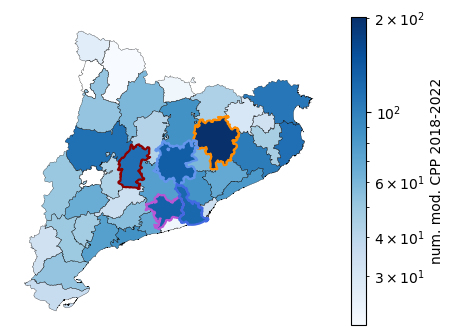

In [36]:
#highlight the counties with most rescue actions
colors = {"Osona":'darkorange',
          "Bages":'cornflowerblue',
          "Alt Penedès":'mediumorchid',
          "Baix Llobregat":'royalblue',
          "Segarra":'darkred'}

fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
norm = LogNorm()
# plt.rc('text', usetex = True)
# plt.rc('font', family='serif')
plot = pam_pp_tot_gpd.plot(column = 'Estat',
                                  ax=ax,
                                  legend=False,
                                  cmap='Blues',
                                  norm = norm,
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.2})
pam_pp_tot_gpd.boundary.plot(ax = ax, linewidth = 0.2, color = 'black')
pam_pp_tot_gpd = pam_pp_tot_gpd.set_index("NOM_COMARCA")
pam_pp_tot_gpd.loc[list(colors.keys()),:].boundary.plot(ax=ax,color=list(colors.values()), linewidth = 1.5)
pam_pp_tot_gpd = pam_pp_tot_gpd.reset_index()
cbar = fig.colorbar(plot.get_children()[0], ax = ax, label = r'num. mod. CPP 2018-2022')
cb_ax = fig.axes[1] 
# cb_ax.tick_params(labelsize=10)
plt.savefig('figures/total_CPP_num_2018_2022.pdf')
plt.show()

### 4. Rescue/ CPP study of Baix Llobregat

#### 4.A Rescue actions study of Baix Llobregat

In [37]:
columns = filt_rescues.columns.to_list()
columns.remove('GEOREFERÈNCIA')
columns.remove('LATITUD')
columns.remove('LONGITUD')
# columns.remove('ACT_DAT_ACTUACIO')
columns.remove('ANY')
columns.remove('MUNICIPI')
# columns.remove('TAL_NOM_ALARMA')
columns.remove('TAL_COD_ALARMA2')

In [38]:
resc_filt_bl = filt_rescues[filt_rescues["NOM_COMARCA"] == "Baix Llobregat"].drop(columns = columns).copy(deep = True)

In [39]:
resc_filt_bl

,TAL_COD_ALARMA2,MUNICIPI,ANY,LONGITUD,LATITUD,GEOREFERÈNCIA
1803,RC,Cervelló,2022,1.968336,41.389724,POINT (1.968336482849 41.389723633915)
1838,MU,Collbató,2022,1.817894,41.585364,POINT (1.817894209259 41.585363674964)
1846,MU,"Papiol, El",2022,NaN,NaN,NaN
1850,MU,Molins de Rei,2022,2.060471,41.437883,POINT (2.060471253494 41.437882960729)
1871,MU,Cervelló,2022,1.929912,41.407613,POINT (1.929911825334 41.407612697399)
...,...,...,...,...,...,...
10174,MU,Molins de Rei,2018,2.077893,41.412137,NaN
10190,RC,Collbató,2018,1.828212,41.569401,NaN
10214,FL,Cornellà de Llobregat,2018,2.059436,41.348674,NaN
10222,RC,Collbató,2018,1.841238,41.574721,NaN


Make new DataFrame with information separated by year and type of rescue action

In [40]:
grouped_by_years_bl = resc_filt_bl.groupby(by = ["ANY", "TAL_COD_ALARMA2"]).count().drop(columns = ["LONGITUD", "LATITUD", "GEOREFERÈNCIA"])
grouped_by_years_bl.rename(columns = {'MUNICIPI':'NUM_ACTIONS'}, inplace = True)
grouped_by_years_bl

NUM_ACTIONS
ANY  TAL_COD_ALARMA2             
2018 FL                         4
     MR                         6
     MU                        48
     RC                        26
2019 CO                         1
     FL                         6
     MR                         3
     MU                        63
     RC                        26
2020 CO                         1
     FL                         2
     MR                         8
     MU                        64
     RC                        24
2021 FL                         3
     MR                         7
     MU                        99
     RC                        26
2022 CO                         1
     FL                         5
     MR                         8
     MU                        70
     RC                        26

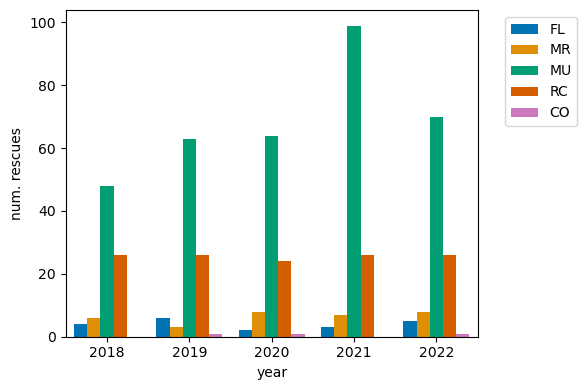

In [43]:
# Create a bar plot. Use a colorblind palette to represent categorical data.
plt.figure(figsize=(6, 4))
sns.barplot(x='ANY', y='NUM_ACTIONS', hue='TAL_COD_ALARMA2', data=grouped_by_years_bl, palette = "colorblind", saturation = 1, width = 0.8)

# Set plot labels and title
plt.xlabel('year')
plt.ylabel('num. rescues')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('Number of Incidents by Year and Incident Type')

# Save and show the plot
plt.tight_layout()
plt.savefig("figures/baix_llobregat.pdf")
plt.show()